In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd
data_path=('FT_CHURN_PROFILE2.csv')
df = pd.read_csv(data_path)

In [2]:
df

,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT
0,50928100037,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12
1,50928100157,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39
2,50928100365,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6
3,50928100784,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12
4,50928101054,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6
5,50928101351,unknown,-18.0,2,-18.0,6,1.350000,0,0,2.700001,2,2
6,50928101724,unknown,-63.0,7,-63.0,55,31.866667,0,179200,57.799999,6,6
7,50928101959,unknown,-18.0,2,-18.0,18,10.100000,4,972800,11.199999,2,2
8,50928103063,unknown,-36.0,4,-36.0,36,24.533333,0,159994384,5.320000,1,4
9,50928103205,unknown,-171.0,25,-225.0,160,119.266667,42,0,242.266668,7,19


In [0]:
pip install entropy-based-binning

In [7]:
import numpy as np
#pd.qcut(df['CHURN_COUNT'], 4)
df['bins'] = np.where(df['CHURN_COUNT']>0, pd.qcut(df['CHURN_COUNT'], 4), 0)

In [19]:
df.head()

,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,bins2
0,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12,3
1,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39,4
2,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6,3
3,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12,2
4,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6,2


In [9]:
df['bins2'] = np.where(df['CHURN_COUNT']<=28,4,5)
df['bins2'] = np.where(df['CHURN_COUNT']<=7,3,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<=3,2,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<=1,1,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<1,0,df['bins2'])

df.head()


,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,bins,bins2
0,50928100037,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12,"(3.0, 7.0]",3
1,50928100157,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39,"(7.0, 28.0]",4
2,50928100365,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6,"(3.0, 7.0]",3
3,50928100784,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12,"(1.0, 3.0]",2
4,50928101054,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6,"(1.0, 3.0]",2


In [18]:
df = df.drop('bins',axis=1)
df = df.drop('ACCOUNTNUMBER',axis=1)

In [20]:
#transforming the data
from sklearn.preprocessing import LabelEncoder
df['GENDER'] = df['GENDER'].apply(LabelEncoder().fit_transform)

ValueError: bad input shape ()

In [21]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'bins']
X = X.loc[:, X.columns != 'bins2']

X = X.loc[:, X.columns != 'CHURN_COUNT']

X = X.loc[:, X.columns != 'GENDER']


y = df.loc[:, df.columns == 'bins2']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X

Shape of X: (2103363, 9)
Shape of y: (2103363, 1)


,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,DAYS_COUNT
0,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,12
1,-351.0,50,-450.0,188,415.366667,251,0,194.533339,39
2,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,6
3,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,12
4,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,6
5,-18.0,2,-18.0,6,1.350000,0,0,2.700001,2
6,-63.0,7,-63.0,55,31.866667,0,179200,57.799999,6
7,-18.0,2,-18.0,18,10.100000,4,972800,11.199999,2
8,-36.0,4,-36.0,36,24.533333,0,159994384,5.320000,4
9,-171.0,25,-225.0,160,119.266667,42,0,242.266668,19


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y['bins2'].unique()

array([3, 4, 2, 1, 0])

In [24]:
!pip install xgboost

    100% |████████████████████████████████| 142.8MB 90kB/s  eta 0:00:011|▊                               | 3.1MB 90.1MB/s eta 0:00:02| 6.6MB 84.0MB/s eta 0:00:02                      | 11.9MB 69.5MB/s eta 0:00:02MB/s eta 0:00:07           | 59.5MB 75.8MB/s eta 0:00:02��█▎               | 72.7MB 68.8MB/s eta 0:00:02��███████████████              | 79.9MB 106.1MB/s eta 0:00:01MB/s eta 0:00:01 0:00:01███▋         | 100.9MB 108.7MB/s eta 0:00:01��█████████████████▉        | 106.2MB 102.9MB/s eta 0:00:01  | 113.4MB 17.2MB/s eta 0:00:02 115.5MB 13.4MB/s eta 0:00:03�███████▏    | 121.3MB 85.4MB/s eta 0:00:01��████████████████████    | 124.7MB 89.6MB/s eta 0:00:01|████████████████████████████▎   | 126.1MB 78.9MB/s eta 0:00:01████████████████████████████▋   | 127.8MB 80.8MB/s eta 0:00:01.6MB 92.1MB/s eta 0:00:01 91.5MB/s eta 0:00:01███████▋ | 136.9MB 87.5MB/s eta 0:00:01�██████████████████████████ | 138.5MB 79.0MB/s eta 0:00:01�█████████████████▍| 140.1MB 89.0MB/s eta 0:00:01
Could not install 

In [25]:

import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

ModuleNotFoundError: No module named 'xgboost'

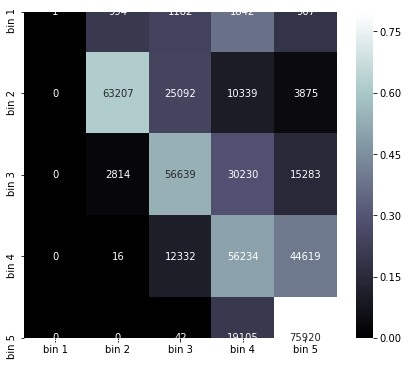

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['bin 1', 'bin 2', 'bin 3','bin 4','bin 5'])

In [0]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

ValueError: ignored

In [0]:
pip install scikit-plot

In [0]:
# Import what's needed for the Functions API
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a Keras classifier. We'll generate probabilities on the test set.
keras_clf.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=2)
probas = keras_clf.predict_proba(X_test, batch_size=64)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()

NameError: ignored

In [0]:
def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):
  df.sort_values(by=probability_col, ascending=False, inplace=True)

  subset = df[df[predicted_col] == True]

  rows = []
  for group in np.array_split(subset, 10):
      score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                                group[predicted_col].tolist(),
                                                normalize=False)

      rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

  lift = pd.DataFrame(rows)

  #Cumulative Gains Calculation
  lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
  lift['PercentCorrect'] = lift.apply(
      lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
  lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
  lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
      lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
          'NumCorrectPredictions'].sum()) * x)
  lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
  lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
  lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
      lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

  #Lift Chart
  lift['NormalisedPercentAvg'] = 1
  lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

  return lift

In [0]:
X_train

,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,DAYS_COUNT,bins
1206377,50944129923,unknown,-18.0,2,-18.0,7,1.050000,57,906113200,8.585000,2,"(1.0, 3.0]"
1126764,50939290424,F,-756.0,66,-780.0,114,40.800000,55,10481218384,139.735000,64,"(3.0, 7.0]"
318586,50934613245,unknown,-40.0,5,-40.0,26,35.266667,1,86703472,47.190000,5,"(1.0, 3.0]"
868535,50938178851,unknown,-9.0,1,-9.0,13,20.400000,51,418207168,32.684167,1,"(-0.001, 1.0]"
1135527,50939356668,unknown,-9.0,1,-9.0,8,4.483333,0,100000,0.000000,1,"(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
374564,50934849579,F,-12.0,1,-12.0,10,3.400000,0,1105920,4.500000,1,"(-0.001, 1.0]"
1659157,50947384509,unknown,-45.0,5,-57.0,24,12.366667,0,217076400,65.700000,4,"(1.0, 3.0]"
963395,50938422172,F,-339.0,60,-537.0,266,178.366667,92,3100653680,162.120000,38,"(7.0, 28.0]"
1484405,50946398933,unknown,-1032.0,129,-1167.0,553,687.833333,16,17414003408,141.944085,111,"(7.0, 28.0]"
